
In this Notebook we design a Potato Health Classifier, with the help of Tensorflow.<br><br>
<b>Dataset:<b><br>
The datset is taken from kaggle datasets, it is called "Plant Village". The dataset includes images of various vegetable plants including Peppers,Tomatoes and Potatoes. The model designed focuses on detecting the health of the potato crop.The dataset includes three classes :<br>
1. Healthy Plant (152 images) 
2. Late Blight  (1000 images)
3. Early Blight  (1000 images)

<br>
The potato crop diseases are of two types: Early Blight or Late Blight, the treatments for these diseases are different so it i sessential to determine what disease the crop is suffering from.

Dataset URL:https://www.kaggle.com/datasets/emmarex/plantdisease<br><br>
Model:The model designed for disease detetcion is a Sequential model it has 17 layers and includes Data Augmentation and rescaling , to make a robust classifier.

<b>Samples:</b><br>
1. <b>Healthy Sample</b><br><br>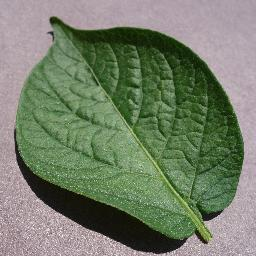

2. <b>Early Blight</b><br><br>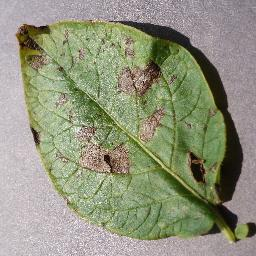

3. <b>Late Blight</b><br><br>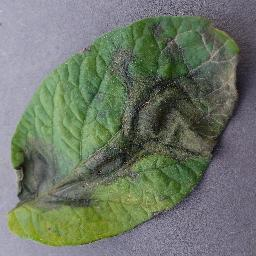

In [ ]:
%tensorflow_version 2.6

UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
!pip3 install -- user  tensorflow==2.6

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement user (from versions: none)
ERROR: No matching distribution found for user


In [ ]:
!pip3 show tensorflow



Name: tensorflow
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\kures\appdata\roaming\python\python38\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras-nightly, keras-preprocessing, numpy, opt-einsum, protobuf, six, tensorboard, tensorflow-estimator, termcolor, typing-extensions, wheel, wrapt
Required-by: 


**Loading data using tf.dataset**

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


NOTE: 
1. We can access the classes of our model by using "dataset.class_names"
2.  Dataset shows 68 because every element in the dataset is a batch of 32 images,just do 32*68 to validate

In [ ]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

Now lets look at the dataset:
The dataset.take(1) means that it takes one batch
32 means batch
256, 256 means size
3 means channels
0,1,2 in the array below means its either health, early blight,late blight
the numbers in the tensor and the numpy array are b/w 0 to 255 and correspond to colors
plt.axis("off"), this hides the axis elements from the plot
label_batch[0] gives class label but its going to be a number in 0,1,2

In [ ]:
for image_batch,label_batch in datset.take(1):
    print("As a tensor: \n")
    print(image_batch[0]) #this prints the image as a tensor
    print("\n Shapeof image 1: \n")
    print(image_batch[0].shape) #this prints the image as a tensor
    
    print("\nAs a numpy array: \n")
    print(image_batch[0].numpy()) #this prints the image as a tensor
    print(image_batch.shape) #this prints the shape
    
    print(label_batch.numpy())

As a tensor: 

tf.Tensor(
[[[192. 189. 198.]
  [177. 174. 183.]
  [180. 177. 186.]
  ...
  [141. 138. 145.]
  [133. 130. 137.]
  [144. 141. 148.]]

 [[187. 184. 193.]
  [182. 179. 188.]
  [194. 191. 200.]
  ...
  [150. 147. 154.]
  [155. 152. 159.]
  [173. 170. 177.]]

 [[171. 168. 177.]
  [175. 172. 181.]
  [194. 191. 200.]
  ...
  [143. 140. 147.]
  [137. 134. 141.]
  [147. 144. 151.]]

 ...

 [[197. 195. 200.]
  [193. 191. 196.]
  [187. 185. 190.]
  ...
  [144. 142. 147.]
  [134. 132. 137.]
  [139. 137. 142.]]

 [[191. 189. 194.]
  [192. 190. 195.]
  [191. 189. 194.]
  ...
  [145. 143. 148.]
  [136. 134. 139.]
  [130. 128. 133.]]

 [[177. 175. 180.]
  [183. 181. 186.]
  [189. 187. 192.]
  ...
  [147. 145. 150.]
  [150. 148. 153.]
  [144. 142. 147.]]], shape=(256, 256, 3), dtype=float32)

 Shapeof image 1: 

(256, 256, 3)

As a numpy array: 

[[[192. 189. 198.]
  [177. 174. 183.]
  [180. 177. 186.]
  ...
  [141. 138. 145.]
  [133. 130. 137.]
  [144. 141. 148.]]

 [[187. 184. 193.]
  

Imshow expects a 3D array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


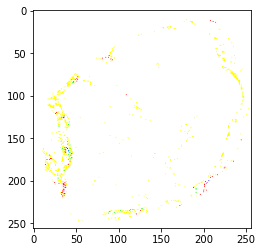

In [ ]:
plt.imshow(image_batch[0].numpy()) # this has floats so image is a little distorted

(-0.5, 255.5, 255.5, -0.5)

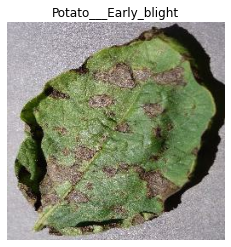

In [ ]:
plt.imshow(image_batch[0].numpy().astype("uint8")) #this converts it to integers the pixel values
plt.title(class_names[label_batch[0]])
plt.axis("off")

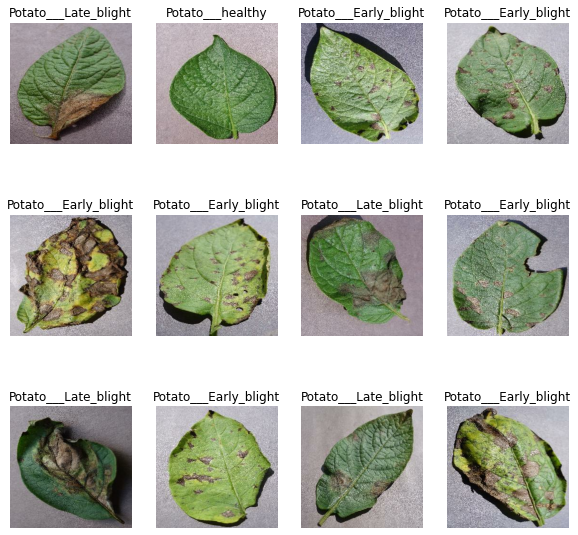

In [ ]:
#looking at the 12 pictures in a batch
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))

Splitting data into train and test
80% training
20% testing (10% validation + 10% test)

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

14

Note: test_ds or test dataset has 14 batches , out of the 14 we take 6 for validation and rest for testing

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(val_size).skip(train_size)
    
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

**We use shuffling and autotune to boost performence.**

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**Now we make the preprocessing pipeline**

In [ ]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

**Model**

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
num_classes=3

model=models.Sequential([
    resize_rescale,
    data_augmentation,
    
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(num_classes,activation="softmax")
])
model.build(input_shape)

**Model Summary**

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

**In this step we define the compilation of the model by providing the optimizer loss function and metrics**

In [ ]:
model.compile(
optimizer="adam",
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

**In this step we run the model byusing the fit function**

In [ ]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 67s 1s/step - loss: 0.9012 - accuracy: 0.5006 - val_loss: 0.8183 - val_accuracy: 0.6719
Epoch 2/50
54/54 [==============================] - 63s 1s/step - loss: 0.6324 - accuracy: 0.7002 - val_loss: 0.3960 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 63s 1s/step - loss: 0.4271 - accuracy: 0.8241 - val_loss: 0.3368 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 67s 1s/step - loss: 0.3027 - accuracy: 0.8779 - val_loss: 0.4311 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 70s 1s/step - loss: 0.2401 - accuracy: 0.9057 - val_loss: 0.2119 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 66s 1s/step - loss: 0.2055 - accuracy: 0.9190 - val_loss: 0.2218 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 64s 1s/step - loss: 0.1703 - accuracy: 0.9375 - val_loss: 0.3389 - val_accuracy: 0.8698
Epoch 8/50
54/54 [==

**Now we test the performence of our model by running it on a test dataset 
Note: for evaluation we use Model.evaluate() and pass in the test dataset an we transfer all of this to a list named scores**

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 7s 252ms/step - loss: 0.0141 - accuracy: 0.9961


In [ ]:
scores

[0.014136742800474167, 0.99609375]

In [ ]:
#history is a keras callback history
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 54}


In [ ]:
#We have 4 parameters, each parameter has 50 entries
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# this is a python list
history.history['accuracy']

[0.5005787014961243,
 0.7002314925193787,
 0.8240740895271301,
 0.8778935074806213,
 0.9056712985038757,
 0.9189814925193787,
 0.9375,
 0.9224537014961243,
 0.9108796119689941,
 0.890625,
 0.9369212985038757,
 0.9479166865348816,
 0.9502314925193787,
 0.9444444179534912,
 0.9594907164573669,
 0.9710648059844971,
 0.9745370149612427,
 0.96875,
 0.9693287014961243,
 0.9693287014961243,
 0.9733796119689941,
 0.9785879850387573,
 0.9785879850387573,
 0.9693287014961243,
 0.9791666865348816,
 0.9780092835426331,
 0.9884259104728699,
 0.984375,
 0.9768518805503845,
 0.9809027910232544,
 0.984375,
 0.9890046119689941,
 0.9924768805503845,
 0.9791666865348816,
 0.9768518805503845,
 0.9820601940155029,
 0.9774305820465088,
 0.9884259104728699,
 0.9780092835426331,
 0.9895833134651184,
 0.9861111044883728,
 0.9832175970077515,
 0.9930555820465088,
 0.9942129850387573,
 0.9901620149612427,
 0.9849537014961243,
 0.9890046119689941,
 0.9959490895271301,
 0.9936342835426331,
 0.9895833134651184]

In [ ]:
for i in history.history['accuracy']:
    print(i)

0.5005787014961243
0.7002314925193787
0.8240740895271301
0.8778935074806213
0.9056712985038757
0.9189814925193787
0.9375
0.9224537014961243
0.9108796119689941
0.890625
0.9369212985038757
0.9479166865348816
0.9502314925193787
0.9444444179534912
0.9594907164573669
0.9710648059844971
0.9745370149612427
0.96875
0.9693287014961243
0.9693287014961243
0.9733796119689941
0.9785879850387573
0.9785879850387573
0.9693287014961243
0.9791666865348816
0.9780092835426331
0.9884259104728699
0.984375
0.9768518805503845
0.9809027910232544
0.984375
0.9890046119689941
0.9924768805503845
0.9791666865348816
0.9768518805503845
0.9820601940155029
0.9774305820465088
0.9884259104728699
0.9780092835426331
0.9895833134651184
0.9861111044883728
0.9832175970077515
0.9930555820465088
0.9942129850387573
0.9901620149612427
0.9849537014961243
0.9890046119689941
0.9959490895271301
0.9936342835426331
0.9895833134651184


Now we plot the accuracies

In [ ]:
#first we divide the list of attributes from history to their own lists
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

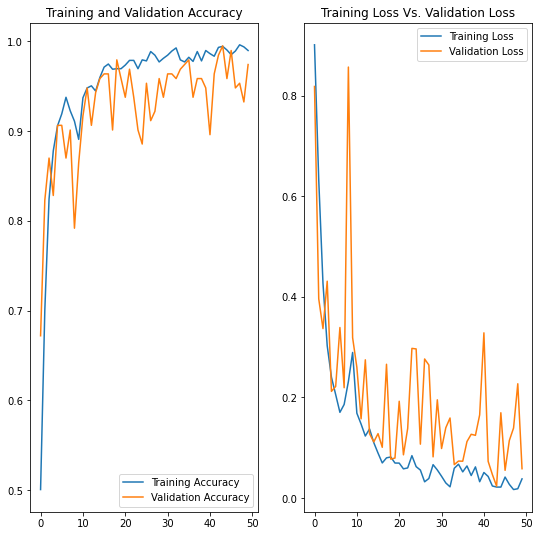

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.title("Training Loss Vs. Validation Loss")
plt.legend(loc="upper right")
plt.show()

Now to cast predictions and see results

In [ ]:
import numpy as np

First Image to predict
Actual Label: Potato___Late_blight
Predicted Label: Potato___Late_blight


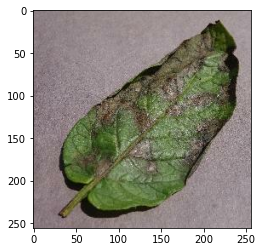

In [ ]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence 

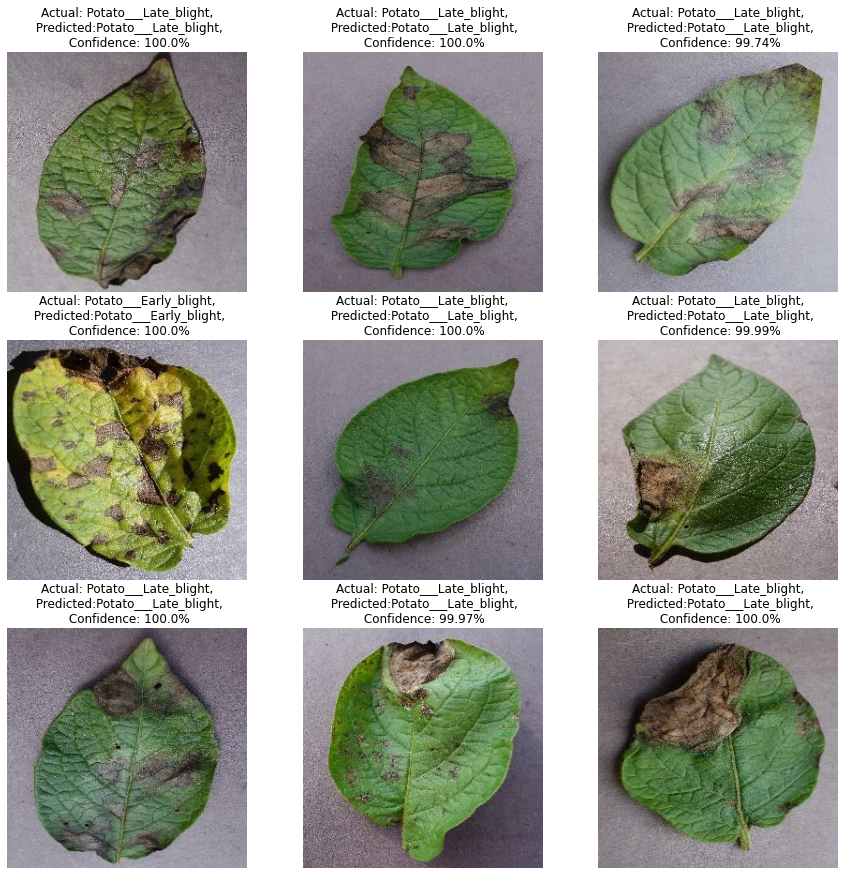

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

Saving the model

In [ ]:
model.save("2",save_format='h5')

In [ ]:
#import os
#model_version=max([int(i) for i in os.listdir("../alu")+[0]])+1
model.save("hysd.h5")